In [1]:
import pandas as pd
import matplotlib
import numpy as np

#### Fertility rate: number of children a woman would give birth to during her childbearing years.

In [2]:
data = pd.read_csv('./fertility_rate.csv')

In [3]:
def drop_cols(data):
    data.drop(["Indicator Code", "Indicator Name", "Country Code"], axis=1, inplace=True)
    return data
data_drop = drop_cols(data)

In [4]:
def drop_null(df):
    '''
    for row in data:
        result = (data[data].dropna())
        del data[]'''
    return df.dropna(how='any', axis=0)
data = drop_null(data)

In [5]:
df = data.set_index("Country Name")

In [6]:
df_mean = df.transpose()

In [7]:
mean = df_mean.mean()

In [8]:
dfmean = pd.DataFrame(mean)

In [9]:
data_last = dfmean.rename(columns={0: "Mean"})

In [10]:
data_last.sort_values("Mean", ascending=False)

,Mean
Country Name,
Niger,7.637404
Somalia,7.188070
"Yemen, Rep.",7.170140
Afghanistan,7.088719
Burundi,7.046175
Angola,7.042825
Mali,6.948772
Rwanda,6.858877
Chad,6.851158


In [11]:
import requests as req

url = "https://countrycode.org"

res = req.get(url)
res.text

'<!DOCTYPE html>\n<!--[if IE 8]>         <html class="ie8" lang="en"> <![endif]-->\n<!--[if IE 9]>         <html class="ie9" lang="en"> <![endif]-->\n<!--[if gt IE 9]><!--> <html lang="en">         <!--<![endif]-->\n    <head>\n        <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n        <title>Country Codes, Phone Codes, Dialing Codes, Telephone Codes, ISO Country Codes</title>\n        \n        <meta name="viewport" content="width=device-width, initial-scale=1">\n        <link rel="canonical" href="https://countrycode.org/"/>\n        \n\n        <!-- Favicon -->\n        <link rel="shortcut icon" type="image/x-icon" rel="stylesheet" href="/static/images/favicon.ico" />\n\n        \n        <link href=\'//fonts.googleapis.com/css?family=Montserrat:400,700\' rel=\'stylesheet\' type=\'text/css\'>\n        <link  rel="stylesheet" href="/global-shared/static/global-icons/font-awesome/css/font

In [12]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'html.parser')

In [13]:
lst_elements = soup.select("tr td a")
countries =[]

for e in lst_elements:
    countries.append(e.text)
    
countries=countries[:240]

In [14]:
lst_gdp = soup.select("tr td")
gdp = list(map(lambda x : x.text,lst_gdp))[5::6][:240]

In [15]:
df = pd.DataFrame()

df["Country Name"]=countries
df["gdp"]=gdp

In [16]:
lst2 = []

for i in df['gdp']:
    lst2.append(i.split(" "))

In [17]:
numeros=[]
for e in lst2:
    if len(e)==1: 
        numeros.append(0)
        
    else: 
        num=float(e[0])
        if len(e)==2:
            if 'M' in e[1]: num*=10e5
            elif 'B' in e[1]: num*=10e8
            elif 'T' in e[1]: num*=10e11
            numeros.append(num)

In [18]:
df["gdp"]=numeros
df_cero = df[(df["gdp"]==0)]

In [19]:
data_final = df[df["gdp"]!=0]
data_final.sort_values(by='gdp',ascending=False)

,Country Name,gdp
228,United States,1.672000e+13
43,China,9.330000e+12
104,Japan,5.007000e+12
77,Germany,3.593000e+12
72,France,2.739000e+12
227,United Kingdom,2.490000e+12
28,Brazil,2.190000e+12
175,Russia,2.113000e+12
101,Italy,2.068000e+12
37,Canada,1.825000e+12


In [85]:
data_merge = data_final.merge(data_last, on='Country Name', how='inner')
data_sorted = data_merge.sort_values('gdp', ascending=False)

In [21]:
data_desc = data_merge.describe()

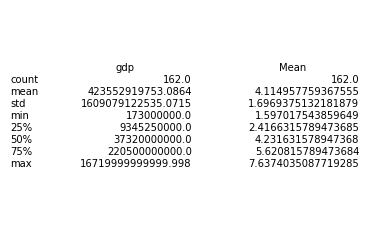

In [102]:
from pandas.plotting import table 

ax = plt.subplot(frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, data_desc, loc='center', edges='open')  # where df is your data frame

plt.savefig('mytable.jpg')

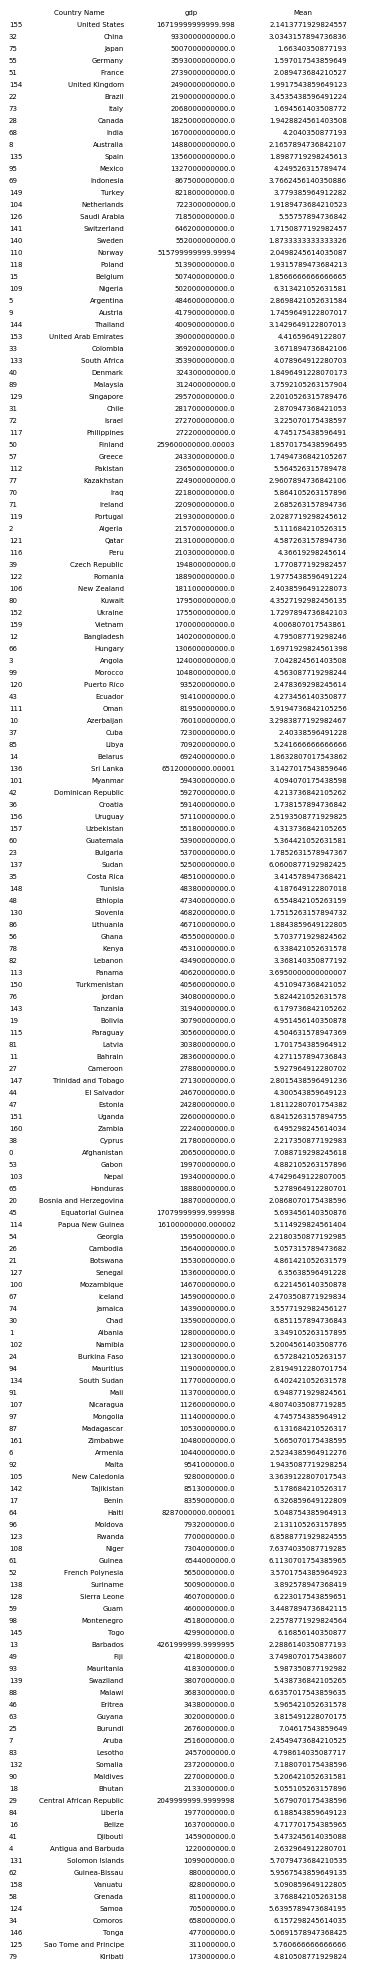

In [130]:
from pandas.plotting import table 

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, data_sorted, loc='center', edges='open')  # where df is your data frame
plt.savefig('mytable1.jpg', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches=None, pad_inches=0.1, metadata=None)

In [131]:
data_sorted.to_html('tablachachi.html')